In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import csv
train= pd.read_csv('/content/drive/My Drive/NLP Project_1/train.csv',error_bad_lines=False,engine="python")
train.head()


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
test= pd.read_csv('/content/drive/My Drive/NLP Project_1/test.csv',error_bad_lines=False,engine="python")
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [4]:
train.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [5]:
#dropping unnecessary columns

train = train.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'])
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [6]:
test = test.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'])
test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


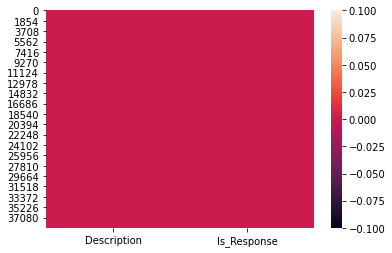

In [7]:
sns.heatmap(train.isnull())

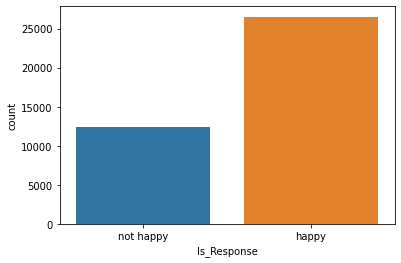

In [8]:
train['Is_Response'].value_counts()
sns.countplot(data=train,x='Is_Response')

In [9]:
train['length']=train['Description'].str.len()
test['length']=test['Description'].str.len()
train.head()

,Description,Is_Response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [10]:
#lowercase
train.Description=train.Description.str.lower()
test.Description=test.Description.str.lower()
import nltk
nltk.download('stopwords')

#Removing stopwords
stop_words=stopwords.words('english')
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))


#Removing Punctuations
import string
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))

#Removing more punctuations
train['Description']=train['Description'].str.replace(r'[^\w\d\s]',' ')

test['Description']=test['Description'].str.replace(r'[^\w\d\s]',' ')

#Removing extra spaces
train['Description']=train['Description'].str.replace(r'\s+]',' ')

test['Description']=test['Description'].str.replace(r'\s+]',' ')

#Removing leading and trailing spaces
train['Description']=train['Description'].str.replace(r'^\s+|\s+?$',' ')

test['Description']=test['Description'].str.replace(r'^\s+|\s+?$',' ')


#Clean_length after punctuations,stopwords removal
train['cleaned_length']=train['Description'].str.len()

test['cleaned_length']=test['Description'].str.len()
train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Description,Is_Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,not happy,248,144
1,stayed crown plaza april april st...,not happy,1077,714
2,booked hotel hotwire lowest price could find ...,not happy,1327,900
3,stayed husband sons way alaska cruise loved h...,happy,502,358
4,girlfriends stayed celebrate th birthdays p...,not happy,1613,1048


In [11]:
train['Description']

0        room kind clean strong smell dogs  generally a...
1        stayed crown plaza april    april           st...
2        booked hotel hotwire lowest price could find  ...
3        stayed husband sons way alaska cruise  loved h...
4        girlfriends stayed celebrate   th birthdays  p...
                               ...                        
38927    arrived late night walked check in area comple...
38928    positive impression location public parking op...
38929    traveling friends shopping show  location grea...
38930    experience ok  paid extra view pool  got view ...
38931    westin wonderfully restored grande dame hotel ...
Name: Description, Length: 38932, dtype: object

In [12]:
train['Is_Response'].replace({'happy':0,'not happy':1},inplace=True)
train

,Description,Is_Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,1,248,144
1,stayed crown plaza april april st...,1,1077,714
2,booked hotel hotwire lowest price could find ...,1,1327,900
3,stayed husband sons way alaska cruise loved h...,0,502,358
4,girlfriends stayed celebrate th birthdays p...,1,1613,1048
...,...,...,...,...
38927,arrived late night walked check in area comple...,0,769,473
38928,positive impression location public parking op...,1,533,386
38929,traveling friends shopping show location grea...,1,1065,676
38930,experience ok paid extra view pool got view ...,1,519,319


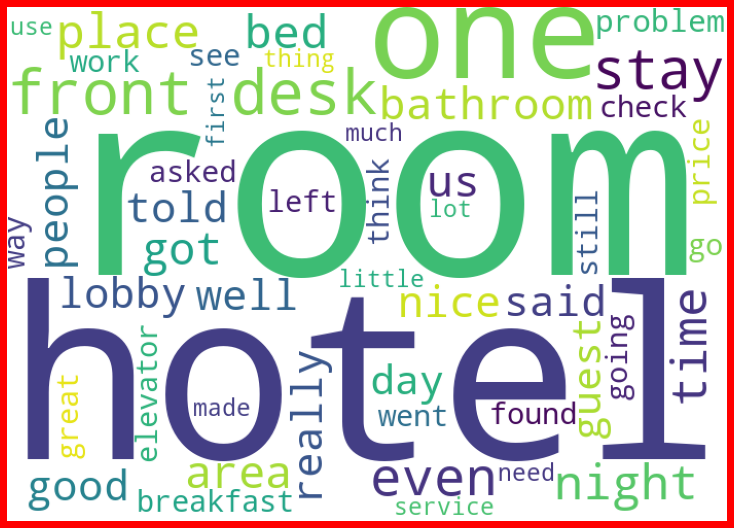

In [13]:
from wordcloud import WordCloud
NotHappy = train['Description'][train['Is_Response']==1]

NotHappy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(NotHappy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(NotHappy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

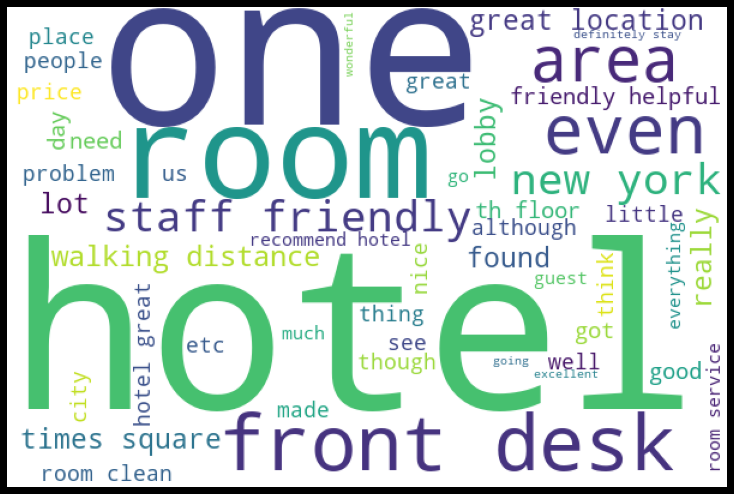

In [14]:
happy = train['Description'][train['Is_Response']==0]
happy_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(happy))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(train['Description'])
X = features
y = train['Is_Response']

In [16]:
X.shape

(38932, 46015)

In [17]:
y.shape

(38932,)

In [18]:
from sklearn.model_selection import train_test_split
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
X_train.shape,x_test.shape,Y_train.shape,y_test.shape

((29199, 46015), (9733, 46015), (29199,), (9733,))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
model=[LogisticRegression(),MultinomialNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.8822562416521114
[[6244  393]
 [ 753 2343]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6637
           1       0.86      0.76      0.80      3096

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733


 
0.8064317271139423
[[6581   56]
 [1828 1268]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6637
           1       0.96      0.41      0.57      3096

    accuracy                           0.81      9733
   macro avg       0.87      0.70      0.72      9733
weighted avg       0.84      0.81      0.78      9733


 
0.884824822767903
[[6250  387]
 [ 734 2362]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6637
           1       0.86      0.76      0.81      3096

    accuracy                           

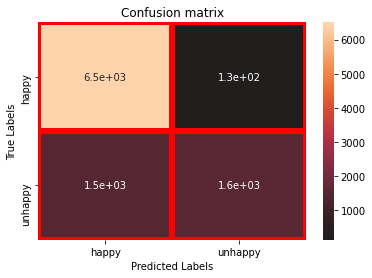

In [21]:
# confusion matrix heatmap
conf_mat = confusion_matrix(y_test,predm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','unhappy'])
ax.yaxis.set_ticklabels(['happy','unhappy'])
plt.show()


In [22]:
conf_mat

array([[6505,  132],
       [1511, 1585]])